<span style="font-size:20px;font-weight:bold">Exploratory Data Analysis on the Crime Data</span>

<span style="font-size:17px;font-weight:bold">Overview</span><br>
<span style="font-size:15px;">This dataset reflects incidents of crime in the City of Los Angeles. The data consist of 932140 rows and 28 columns.</span>


<span style="font-size:17px;font-weight:bold">Objective</span><br>
<span style="font-size:15px;">The analysis seeks to accomplish the following goals:<br>
- Understanding Crime Trends: Investigating the temporal patterns of crime occurrences over time, including variations by month, day of the week, and time of day.<br>
- Identifying High-Crime Areas: Determining the geographic concentrations of crime by examining the distribution of incidents across various areas and neighborhoods.<br>
- Examining Crime Types: Analyzing the prevalence and distribution of different types of crimes in the dataset, identifying common offenses and their frequencies.<br>
- Uncovering Correlations and Relationships: Exploring potential connections and associations between different variables within the dataset, such as the relationship between crime rates and socio-economic factors.</span>


<span style="font-size:17px;font-weight:bold">Data Description</span><br>
<span style="font-size:15px;">
- DR_NO: Report number associated with the crime incident.<br>
- Date_Reported: Date when the crime was reported.<br>
- Date_Occurred: Date when the crime occurred.<br>
- Time_Occurred: Time when the crime occurred.<br>
- Area_Code: Code representing the area where the crime occurred.<br>
- Area_Name: Name of the area where the crime occurred.<br>
- Report_District_Number: Number representing the reporting district.<br>
- Part_Type: Type of crime (Part 1 or Part 2).<br>
- Crime_Code: Code representing the type of crime.<br>
- Crime_Description: Description of the crime.<br>
- Victim_Age: Age of the victim.<br>
- Victim_Sex: Gender of the victim.<br>
- Victim_Descent: Descent of the victim.<br>
- Premises_Code: Code representing the premises where the crime occurred.<br>
- Status: Status of the crime.<br>
- Status_Desc: Description of the crime status.<br>
- Crime_Code_1: Additional crime code.<br>
- Location: Location where the crime occurred.<br>
- Latitude: Latitude coordinate of the crime location.<br>
- Longitude: Longitude coordinate of the crime location.<br>
</span>

<span style="font-size:18px;font-weight:bold">Getting the Right Environment</span>

In [1]:
#import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<span style="font-size:20px;font-weight:bold">Reading and Understanding the Datasets</span>

In [2]:
#Loading the dataset
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
#Display the first 5 rows of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
#Display the number of rows and columns
print(df.shape)

(932140, 28)


In [5]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932140 entries, 0 to 932139
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           932140 non-null  int64  
 1   Date Rptd       932140 non-null  object 
 2   DATE OCC        932140 non-null  object 
 3   TIME OCC        932140 non-null  int64  
 4   AREA            932140 non-null  int64  
 5   AREA NAME       932140 non-null  object 
 6   Rpt Dist No     932140 non-null  int64  
 7   Part 1-2        932140 non-null  int64  
 8   Crm Cd          932140 non-null  int64  
 9   Crm Cd Desc     932140 non-null  object 
 10  Mocodes         801530 non-null  object 
 11  Vict Age        932140 non-null  int64  
 12  Vict Sex        807934 non-null  object 
 13  Vict Descent    807924 non-null  object 
 14  Premis Cd       932130 non-null  float64
 15  Premis Desc     931578 non-null  object 
 16  Weapon Used Cd  321339 non-null  float64
 17  Weapon Des

In [6]:
#Descriptive statistics for numerical columns in the DataFrame.
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.321400e+05,932140.000000,932140.000000,932140.000000,932140.000000,932140.000000,932140.000000,932130.000000,321339.000000,932129.000000,67590.000000,2265.000000,64.00000,932140.000000,932140.000000
mean,2.185885e+08,1337.717757,10.711552,1117.594370,1.410221,500.820799,29.544078,306.613841,363.632080,500.565202,958.034694,983.983223,991.21875,33.991109,-118.067008
std,1.227977e+07,652.577100,6.100501,610.077215,0.491874,207.444585,21.868290,217.467312,123.609686,207.237336,110.396406,51.944671,27.06985,1.680895,5.826718
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.104159e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430100
50%,2.206121e+08,1417.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058800,-118.322300
75%,2.306094e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164800,-118.273900
max,2.499138e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [7]:
#Total value counts in the crime code description column
df['Crm Cd Desc'].value_counts()

Crm Cd Desc
VEHICLE - STOLEN                                      100225
BATTERY - SIMPLE ASSAULT                               73759
THEFT OF IDENTITY                                      57539
BURGLARY FROM VEHICLE                                  57538
BURGLARY                                               57015
                                                       ...  
THEFT, COIN MACHINE - ATTEMPT                              6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
TRAIN WRECKING                                             1
Name: count, Length: 139, dtype: int64

In [8]:
##Total value counts in the area name column
df['AREA NAME'].value_counts()

AREA NAME
Central        63133
77th Street    58353
Pacific        54446
Southwest      52581
Hollywood      49080
Olympic        47069
Southeast      47068
N Hollywood    46993
Newton         46096
Wilshire       44753
Rampart        43617
West LA        42668
Northeast      39876
Van Nuys       39563
West Valley    39265
Harbor         38491
Devonshire     38309
Topanga        38232
Mission        37155
Hollenbeck     34493
Foothill       30899
Name: count, dtype: int64

In [9]:
#Sum of null values in each columns
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           130610
Vict Age               0
Vict Sex          124206
Vict Descent      124216
Premis Cd             10
Premis Desc          562
Weapon Used Cd    610801
Weapon Desc       610801
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          864550
Crm Cd 3          929875
Crm Cd 4          932076
LOCATION               0
Cross Street      786138
LAT                    0
LON                    0
dtype: int64


In [10]:
#Sum of duplicates
sum(df.duplicated())

0

> #### Identifying continuos and categorical columns

In [11]:
# Threshold for considering a column as categorical based on unique values
unique_value_threshold = 10

# Identify continuous and categorical columns
continuous = []
categorical = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > unique_value_threshold:
        continuous.append(col)
    else:
        categorical.append(col)

print("Continuous Columns:", continuous)
print("Categorical Columns:", categorical)

Continuous Columns: ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'LAT', 'LON']
Categorical Columns: ['Date Rptd', 'DATE OCC', 'AREA NAME', 'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 4', 'LOCATION', 'Cross Street']


In [12]:
# Drop unnecessary columns
# List of columns to drop
columns_to_drop = ['Mocodes', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
print(df.isnull().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex          124206
Vict Descent      124216
Premis Cd             10
Premis Desc          562
Weapon Used Cd    610801
Weapon Desc       610801
Status                 0
Status Desc            0
Crm Cd 1              11
LOCATION               0
LAT                    0
LON                    0
dtype: int64


> #### Data Cleaning and Wrangling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Select relevant columns and drop rows with missing values in the target columns
data = df[['Vict Age', 'AREA', 'Vict Sex', 'Vict Descent']].dropna(subset=['Vict Sex', 'Vict Descent'])

# Encode categorical variables (e.g., 'AREA')
data_encoded = pd.get_dummies(data, columns=['AREA'])

# Split the dataset into features and target variables
X = data_encoded.drop(columns=['Vict Sex', 'Vict Descent'])
y_sex = data_encoded['Vict Sex']
y_descent = data_encoded['Vict Descent']

# Split the data into training and testing sets
X_train, X_test, y_train_sex, y_test_sex = train_test_split(X, y_sex, test_size=0.2, random_state=42)
X_train, X_test, y_train_descent, y_test_descent = train_test_split(X, y_descent, test_size=0.2, random_state=42)

# Train a Random Forest classifier for predicting 'Vict Sex'
rf_sex = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sex.fit(X_train, y_train_sex)

# Train a Random Forest classifier for predicting 'Vict Descent'
rf_descent = RandomForestClassifier(n_estimators=100, random_state=42)
rf_descent.fit(X_train, y_train_descent)

# Evaluate the models
print("Evaluation for 'Vict Sex':")
print(classification_report(y_test_sex, rf_sex.predict(X_test)))

print("Evaluation for 'Vict Descent':")
print(classification_report(y_test_descent, rf_descent.predict(X_test)))


# Predict missing values for the original dataset
missing_data = df[['Vict Age', 'AREA']].loc[df['Vict Sex'].isnull() | df['Vict Descent'].isnull()]
missing_data_encoded = pd.get_dummies(missing_data, columns=['AREA'])

# Predict missing 'Vict Sex' values
predicted_sex = rf_sex.predict(missing_data_encoded)

# Predict missing 'Vict Descent' values
predicted_descent = rf_descent.predict(missing_data_encoded)

# Update original dataset with predicted values
missing_sex_index = df.index[df['Vict Sex'].isnull()]
missing_descent_index = df.index[df['Vict Descent'].isnull()]

# Trim excess predicted values to match the number of missing indices
predicted_sex = predicted_sex[:len(missing_sex_index)]
predicted_descent = predicted_descent[:len(missing_descent_index)]

# Create DataFrames with predicted values and appropriate indices
predicted_sex_df = pd.DataFrame(predicted_sex, index=missing_sex_index, columns=['Vict Sex'])
predicted_descent_df = pd.DataFrame(predicted_descent, index=missing_descent_index, columns=['Vict Descent'])

# Update DataFrame using .loc[]
df.loc[missing_sex_index, 'Vict Sex'] = predicted_sex_df['Vict Sex']
df.loc[missing_descent_index, 'Vict Descent'] = predicted_descent_df['Vict Descent']

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)

Evaluation for 'Vict Sex':
              precision    recall  f1-score   support

           F       0.55      0.48      0.51     67903
           H       0.00      0.00      0.00        23
           M       0.57      0.62      0.59     76479
           X       0.79      0.90      0.84     17179

    accuracy                           0.59    161584
   macro avg       0.48      0.50      0.49    161584
weighted avg       0.58      0.59      0.59    161584

Evaluation for 'Vict Descent':
              precision    recall  f1-score   support

           -       0.00      0.00      0.00         1
           A       0.20      0.01      0.01      4174
           B       0.50      0.24      0.32     26166
           C       0.00      0.00      0.00       774
           D       0.00      0.00      0.00        14
           F       0.00      0.00      0.00       796
           G       0.00      0.00      0.00        12
           H       0.51      0.72      0.60     56573
           I       0

In [15]:
# Drop unnecessary columns
# List of columns to drop
updated_df=pd.read_csv('updated_dataset.csv')
columns_to_drop = ['Mocodes', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc']
updated_df.dropna(subset=['Premis Cd', 'Crm Cd 1'], inplace=True)

# Drop the columns

updated_df.drop(columns=columns_to_drop, inplace=True)
print(updated_df.isnull().sum())

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64


In [18]:
# Renaming column names for ease
updated_df.rename(columns={
    'Date Rptd': 'Date_Reported',
    'DATE OCC': 'Date_Occurred',
    'TIME OCC': 'Time_Occurred',
    'AREA': 'Area_Code',
    'AREA NAME': 'Area_Name',
    'Rpt Dist No': 'Report_District_Number',
    'Part 1-2': 'Part_Type',
    'Crm Cd': 'Crime_Code',
    'Crm Cd Desc': 'Crime_Description',
    'Vict Age': 'Victim_Age',
    'Vict Sex': 'Victim_Sex',
    'Vict Descent': 'Victim_Descent',
    'Premis Cd': 'Premises_Code',
    'Crm Cd 1': 'Crime_Code_1',
    'LOCATION': 'Location',
    'LAT': 'Latitude',
    'LON': 'Longitude'
}, inplace=True)

# Data Type Conversion
# Convert 'Date_Reported' and 'Date_Occurred' to datetime
updated_df['Date_Reported'] = pd.to_datetime(updated_df['Date_Reported'])
updated_df['Date_Occurred'] = pd.to_datetime(updated_df['Date_Occurred'])

#Dropping rows where victim_Age =0
updated_df = updated_df[updated_df['Victim_Age'] != 0]

In [19]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696066 entries, 1 to 932138
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DR_NO                   696066 non-null  int64         
 1   Date_Reported           696066 non-null  datetime64[ns]
 2   Date_Occurred           696066 non-null  datetime64[ns]
 3   Time_Occurred           696066 non-null  int64         
 4   Area_Code               696066 non-null  int64         
 5   Area_Name               696066 non-null  object        
 6   Report_District_Number  696066 non-null  int64         
 7   Part_Type               696066 non-null  int64         
 8   Crime_Code              696066 non-null  int64         
 9   Crime_Description       696066 non-null  object        
 10  Victim_Age              696066 non-null  int64         
 11  Victim_Sex              696066 non-null  object        
 12  Victim_Descent          696066 non-

> #### EDA -Exploratory Data Analysis

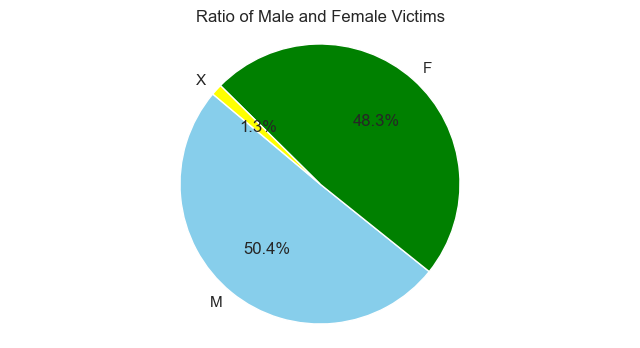

In [62]:
# Generate a pie plot for the ratio of male and female victims
victim_sex_counts = updated_df['Victim_Sex'].value_counts()
labels = victim_sex_counts.index
sizes = victim_sex_counts.values
colors = ['skyblue', 'green','yellow']  # Custom colors for male and female
sizes = sizes[:-1] 

plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels[:-1], autopct='%0.1f%%', startangle=140, colors=colors)
plt.title('Ratio of Male and Female Victims')
plt.axis('equal') 
plt.show()


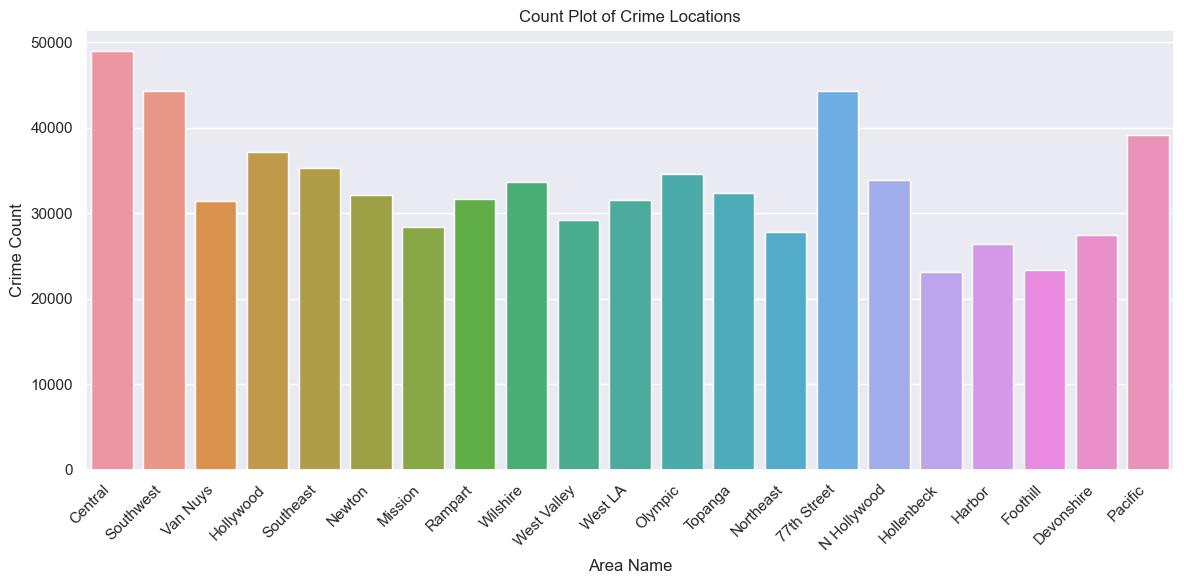

In [21]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=updated_df, x='Area_Name')
plt.title('Count Plot of Crime Locations')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

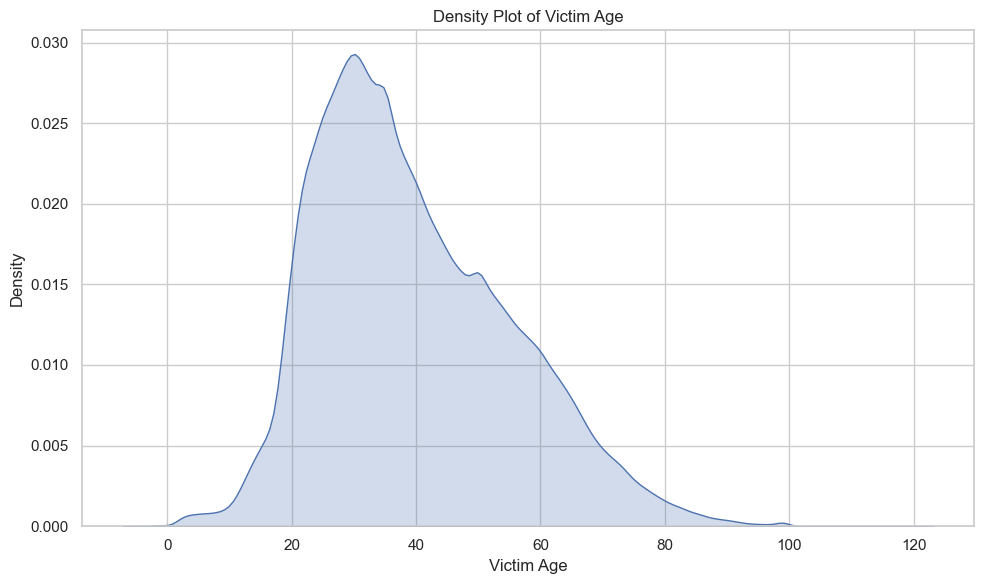

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=updated_df['Victim_Age'], shade=True)
plt.title('Density Plot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Density')
plt.tight_layout() 
plt.show()

> #### Log transformation for numerical variables

In [23]:
numerical_cols = ['Victim_Age', 'Premises_Code', 'Crime_Code_1']
for col in numerical_cols:
    if updated_df[col].min() > 0:  # Check if the minimum value is greater than 0 to avoid taking log of 0 or negative values
        updated_df[col] = np.log(updated_df[col])

> #### Bivariate Analysis

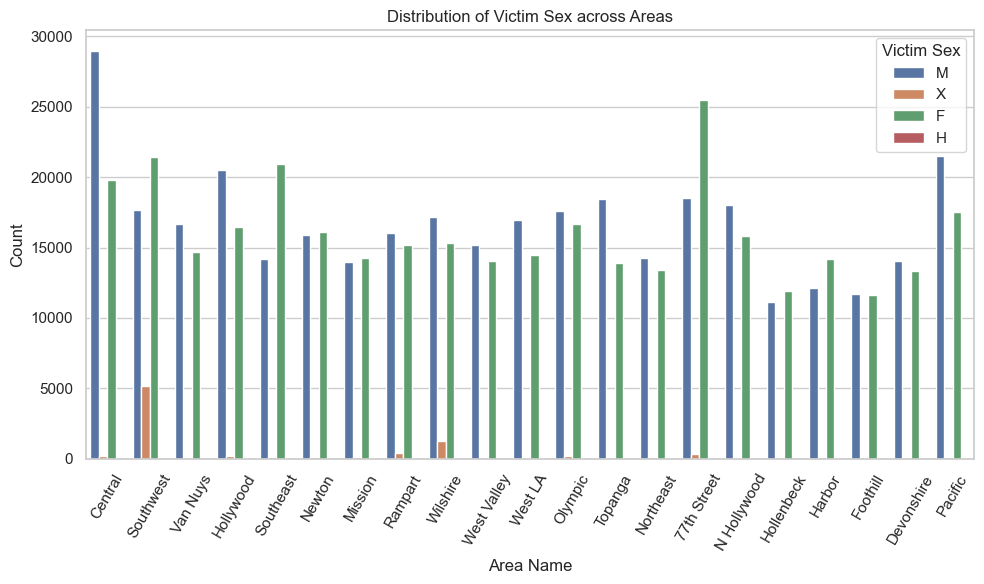

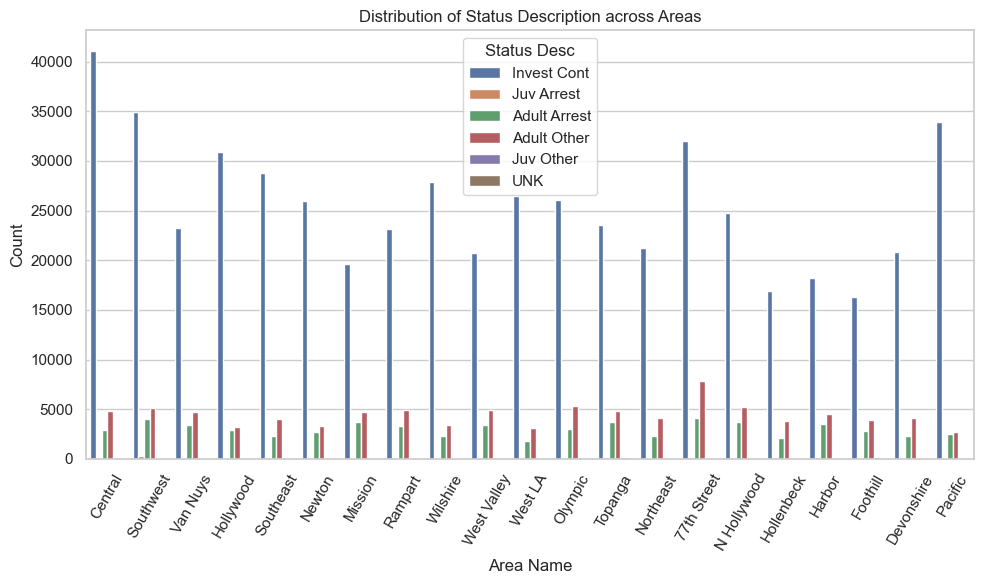

In [66]:
# Stacked bar chart for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=updated_df, x='Area_Name', hue='Victim_Sex')
plt.title('Distribution of Victim Sex across Areas')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Victim Sex')
plt.tight_layout()
plt.show()

# Bar plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=updated_df, x='Area_Name', hue='Status Desc')
plt.title('Distribution of Status Description across Areas')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Status Desc')
plt.tight_layout()
plt.show()

> #### Multivariate Analysis

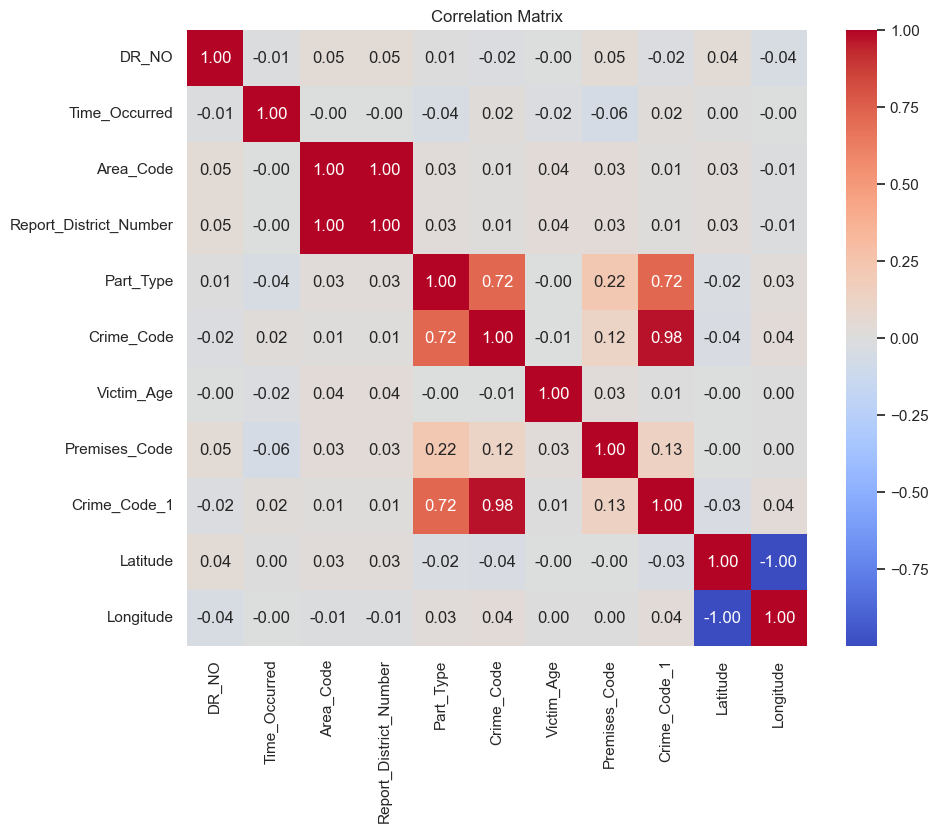

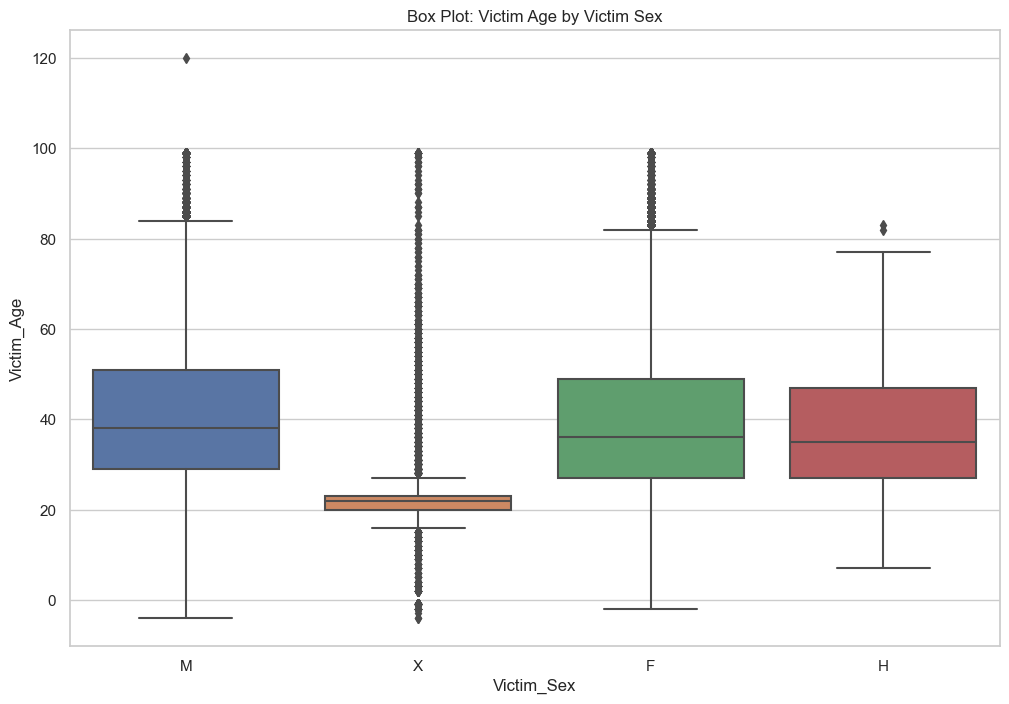

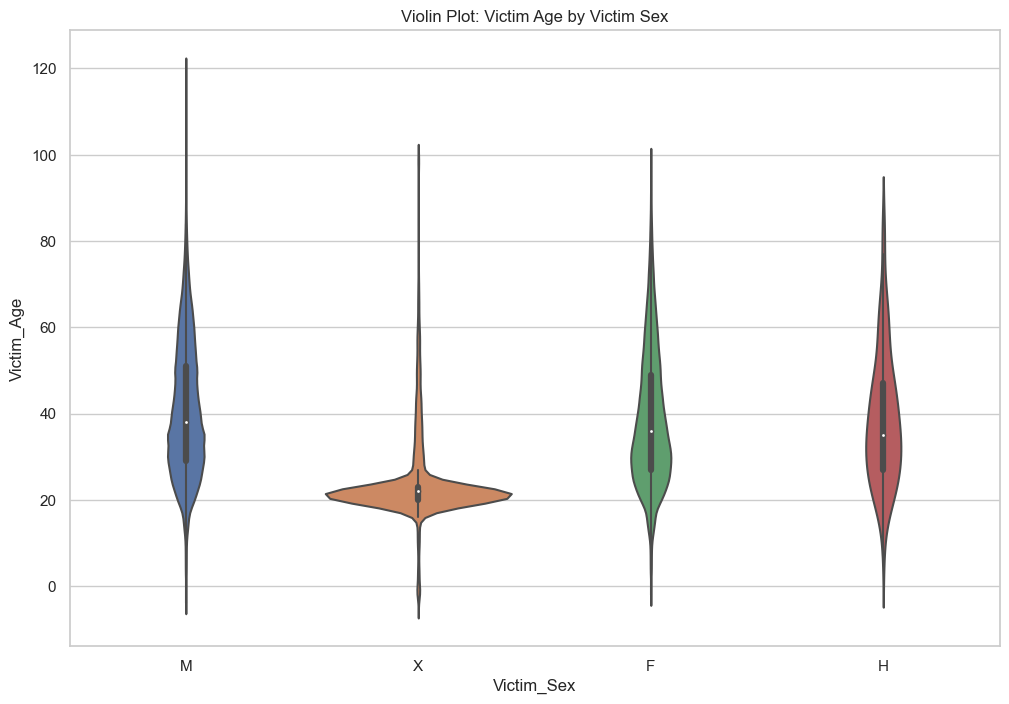

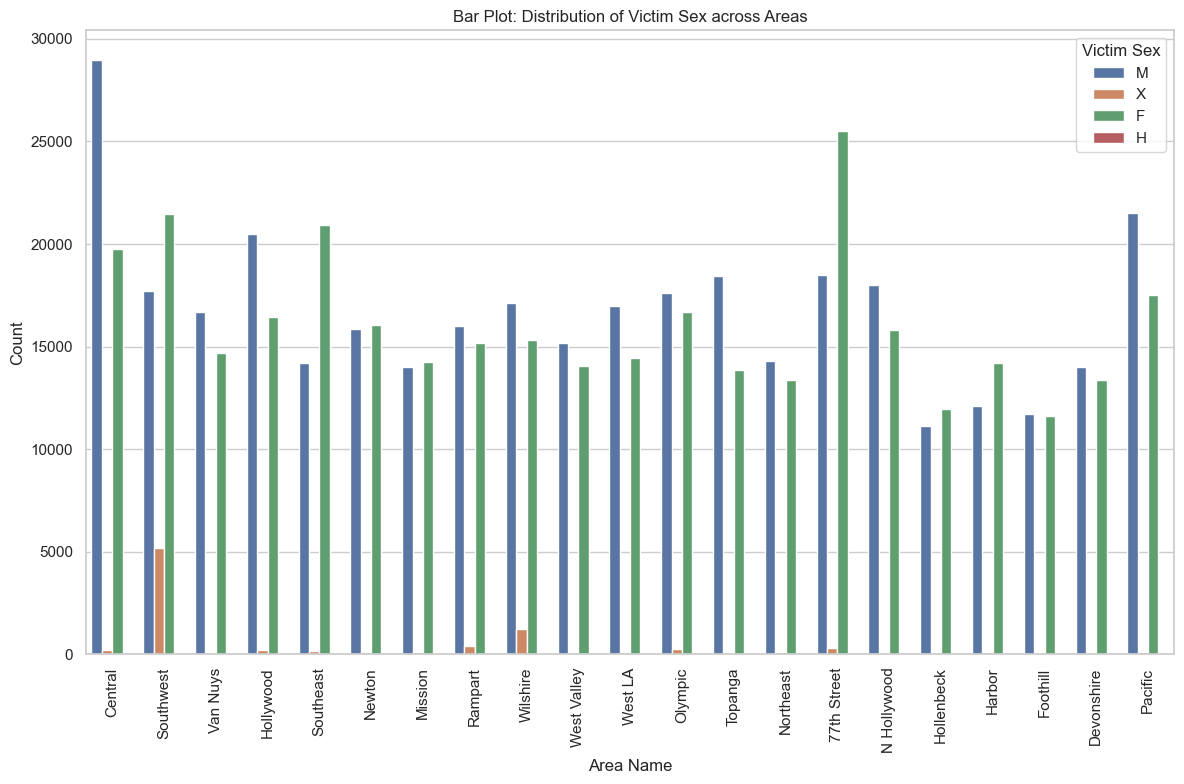

In [67]:
# Selecting numerical columns for correlation matrix
numerical_columns = updated_df.select_dtypes(include=['number']).columns

# Correlation Matrix
corr_matrix = updated_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=updated_df, x='Victim_Sex', y='Victim_Age')
plt.title('Box Plot: Victim Age by Victim Sex')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=updated_df, x='Victim_Sex', y='Victim_Age')
plt.title('Violin Plot: Victim Age by Victim Sex')
plt.show()

# Bar Plot
plt.figure(figsize=(12, 8))
sns.countplot(data=updated_df, x='Area_Name', hue='Victim_Sex')
plt.title('Bar Plot: Distribution of Victim Sex across Areas')
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Victim Sex')
plt.tight_layout()
plt.show()


<span style="font-size:25px;font-weight:bold">Conclusion</span>

<span style="font-size:18px;font-weight:bold">Structure of the dataset</span><br>
<span style="font-size:15px;">
- Datatypes: float64(8), int64(7), object(13)<br>
- Number of Columns: 28, Number of rows: 932140<br>
</span>

<span style="font-size:18px;font-weight:bold">Analysis Summary</span><br>
<span style="font-size:15px;">
- The most common crime is VEHICLE - STOLEN, followed by BATTERY - SIMPLE ASSAULT and THEFT OF IDENTITY.<br>
- There are no duplicate values in the dataset.<br>
-  Continuous Columns: ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd  1', 'Crm Cd 2', 'Crm Cd 3', 'LAT', 'LON']<br>
  -Categorical Columns: ['Date Rptd', 'DATE OCC', 'AREA NAME', 'Part 1-2', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 4', 'LOCATION', 'Cross Street']<br>
- The columns "Victim Sex" and "Victim Descent" exhibit a considerable number of missing values. To address this issue, we utilized a random forest classifier for modeling to predict and fill in these missing values.<br>
- The pie chart indicates that male victims outnumber female victims by a margin of 2%.<br>
- Central emerges as the area with the highest number of reported cases, followed by 77th Street and Pacific.<br>
- The density plot illustrates that the majority of crime victims fall within the age group of 25 to 35 years.<br>
- In the Central Region, the proportion of male victims significantly exceeds that of female victims, whereas in the 77th Street area, females are targeted more frequently than males as shown in the multivariate plot.<br>
- The plot illustrates that across nearly all areas, the predominant cases are those under investigation, followed by incidents involving adults where the situation doesn't lead to arrests.<br>
</span>
